In [1]:
%matplotlib inline
import numpy as np
from proj1_helpers import *
from implementations import *
from helpers import *
from cross_validation import *
%load_ext autoreload
%autoreload 2

In [2]:
y, features, ids = load_csv_data('train.csv')
yTest , featuresTest, idsTest = load_csv_data('test.csv')

In [195]:
index0_train = np.where(features[:,22] == 0)
index1_train = np.where(features[:,22] == 1)
index2_train = np.where((features[:,22] == 2) | (features[:,22] == 3))

index0_without_mass = np.where((features[:,22] == 0) & (features [:,0] == -999))

index0_test = np.where(featuresTest[:,22] == 0)
index1_test = np.where(featuresTest[:,22] == 1)
index2_test = np.where((featuresTest[:,22] == 2) | (featuresTest[:,22] == 3))

In [196]:

def create_dataset(dataset, y, index0, index1, index2, index3):
    
    jet_0 = dataset[index0]
    y0 = y[index0]
    
    jet_0_without_mass = dataset[index3]
    y0_without_mass = y[index3]
    
    jet_1 = dataset[index1]
    y1 = y[index1]
    
    jet_2_3 = dataset[index2]
    y2_3 = y[index2]
    
    mass_column_0 = jet_0[:,0]
    mass_column_1 = jet_1[:,0]
    mass_column_2 = jet_2_3[:,0]
    

    jet_0 = np.delete(jet_0, [0,4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29], 1)
    jet_0_without_mass = np.delete(jet_0_without_mass, [0,4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29], 1)
    jet_1 = np.delete(jet_1, [0, 4, 5, 6, 12, 22, 26, 27, 28], 1)
    jet_2_3 = np.delete(jet_2_3, [0, 22], 1)
    
    return jet_0, jet_0_without_mass, jet_1, jet_2_3, y0, y0_without_mass, y1, y2_3, 

In [222]:
jet0_train, jet0_wm_train, jet1_train, jet2_3_train, y0_train, y0_wm_train, y1_train, y2_3_train = create_dataset(features, y, index0_train, index1_train, index2_train, index0_without_mass)
jet0_test, jet1_test, jet2_3_test, y0_test, y1_test, y2_3_test, mass0_test, mass1_test = create_dataset(featuresTest, yTest, index0_test, index1_test, index2_test, index0_without_mass)


In [204]:
print(jet0_wm_train.shape)

(26123, 17)


In [200]:
def add_features_jet0(dataset):
    index_tau = [8, 9, 10]
    index_lep = [11, 12, 13]
    index_met = [14, 15, 16]
    
    features_to_add = []
   
     
    features_to_add.append(compute_transverse_mass(dataset, index_tau, index_lep))
    features_to_add.append(compute_transverse_mass(dataset, index_tau, index_met))
    
    
    features_to_add.append(compute_pseudo_rapidity(dataset, 9, 12))
    
    #features_to_add.append(compute_product_pseudo(dataset, 9, 12))
    
    
    
    features_to_add = np.array(features_to_add).transpose()
    features_to_add, m, s = standardize(features_to_add)
    
    print(features_to_add.shape)
    return np.concatenate((dataset,features_to_add), 1)

In [223]:


jet0_wm_train, mean0, std0 = standardize(jet0_wm_train)
#jet0_test = (jet0_test - mean0) / std0

#mass0, mean_mass0, std_mass0 = standardize(clean_column(mass0))
#jet0_train = np.append(jet0_train, mass0.reshape(-1,1), 1)

#mass0_test = normalize(clean_column(mass0_test))
#jet0_test = np.append(jet0_test, mass0_test.reshape(-1,1),1)

In [219]:
#jet0_wm_train = add_features_jet0(jet0_wm_train)
#jet0_train = normalize(jet0_train)
#jet0_test = add_features_jet0(jet0_test)
#jet0_test = normalize(jet0_test)

(26123, 3)


In [144]:
#jet0_train = np.delete(jet0_train, [10,13], 1)
#jet0_test = np.delete(jet0_test, [10,13], 1)
#jet0_train, mean, std = standardize(jet0_train)
#jet0_test = (jet0_test-mean) / std

In [224]:
combi, mean_combi, std_combi = standardize(combinations(jet0_wm_train))
print(combi.shape)
#combi = standardize(combi)
jet0_wm_train, mean, std = standardize(build_poly(jet0_wm_train,1,7))
jet0_wm_train = np.concatenate((np.ones(jet0_wm_train.shape[0]).reshape(-1,1), jet0_wm_train), 1)
print(jet0_wm_train.shape)
#jet0_test = normalize(build_poly(jet0_test, 1, 5))

jet0_wm_train = np.concatenate((jet0_wm_train,combi), 1)

#jet0_train, m, s = standardize(jet0_train)

(26123, 136)
(26123, 120)


0.9496937212863706 5.17947467923e-11
0.427523221753 0.00517947467923


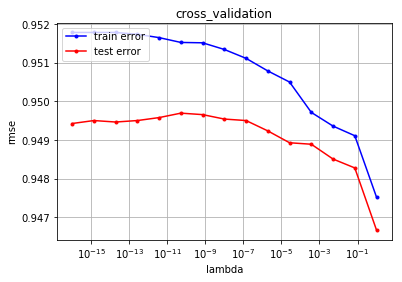

In [225]:
cross_validation_demo(y0_wm_train, jet0_wm_train, np.logspace(-16,0,15), 11)

In [712]:
w0, loss0 = ridge_regression(y0_train, jet0_train, 2.07*10**-7)

In [713]:
def add_features_jet1(dataset):
    index_tau = [8, 9, 10]
    index_lep = [11, 12, 13]
    index_met = [14, 15, 16]
    index_jet_lead = [17, 18, 19]
    
    
    features_to_add = []
   
    features_to_add.append(compute_invariant_mass(dataset, index_tau, index_jet_lead))
    features_to_add.append(compute_invariant_mass(dataset, index_lep, index_jet_lead))
    
    
    features_to_add.append(compute_transverse_mass(dataset, index_tau, index_lep))
    features_to_add.append(compute_transverse_mass(dataset, index_tau, index_met))
    features_to_add.append(compute_transverse_mass(dataset, index_tau, index_jet_lead))
    features_to_add.append(compute_transverse_mass(dataset, index_lep, index_jet_lead))
    features_to_add.append(compute_transverse_mass(dataset, index_jet_lead, index_met))
    
    
    
    features_to_add.append(compute_pseudo_rapidity(dataset, 9, 12))
    features_to_add.append(compute_pseudo_rapidity(dataset, 9, 18)) 
    features_to_add.append(compute_pseudo_rapidity(dataset, 12, 18))
    
    features_to_add.append(compute_product_pseudo(dataset, 9, 12))
    features_to_add.append(compute_product_pseudo(dataset, 9, 18))
    features_to_add.append(compute_product_pseudo(dataset, 12, 18))
    
    features_to_add = np.array(features_to_add).transpose()
    #features_to_add, mean, std = standardize(features_to_add)
    
    print(features_to_add.shape)
    return np.concatenate((dataset,features_to_add), 1)


In [714]:
jet1_train, mean, std = standardize(jet1_train)
jet1_test = (jet1_test - mean) / std

mass1 = normalize(clean_column(mass1))
jet1_train = np.append(jet1_train, mass1.reshape(-1,1), 1)

mass1_test = normalize(clean_column(mass1_test))
jet1_test = np.append(jet1_test, mass1_test.reshape(-1,1), 1)

In [715]:
jet1_train = add_features_jet1(jet1_train)
jet1_test = add_features_jet1(jet1_test)

jet1_train = np.delete(jet1_train, [9, 10, 12, 13, 18, 19], 1)
jet1_test = np.delete(jet1_test, [9, 10, 12, 13, 18, 19], 1)

jet1_train = normalize(jet1_train)
jet1_test = normalize(jet1_test)


(77544, 13)
(175338, 13)


In [716]:
#comb = np.sqrt(combinations(jet1_train))
jet1_train = normalize(build_poly(jet1_train,1,5))
jet1_test = normalize(build_poly(jet1_test, 1, 5))

#jet1_train = np.concatenate((jet1_train, comb), 1)


In [717]:
#cross_validation_demo(y1_train, jet1_train, np.logspace(-18,0,20), 7)

In [718]:
w1, loss1 = ridge_regression(y1_train, jet1_train, 2.63665*10**-8)


In [719]:
def add_features_jet2_3(dataset):
    index_tau = [12, 13, 14]
    index_lep = [15, 16, 17]
    index_met = [18, 19, 20]
    index_jet_lead = [21, 22, 23]
    index_jet_sub = [24, 25, 26]
    
    features_to_add = []
   
    features_to_add.append(compute_invariant_mass(dataset, index_tau, index_jet_lead))
    features_to_add.append(compute_invariant_mass(dataset, index_tau, index_jet_sub))
    features_to_add.append(compute_invariant_mass(dataset, index_lep, index_jet_lead))
    features_to_add.append(compute_invariant_mass(dataset, index_lep, index_jet_sub))
    
    
    features_to_add.append(compute_transverse_mass(dataset, index_tau, index_lep))
    features_to_add.append(compute_transverse_mass(dataset, index_tau, index_met))
    features_to_add.append(compute_transverse_mass(dataset, index_tau, index_jet_lead))
    features_to_add.append(compute_transverse_mass(dataset, index_tau, index_jet_sub))
    features_to_add.append(compute_transverse_mass(dataset, index_lep, index_jet_lead))
    features_to_add.append(compute_transverse_mass(dataset, index_lep, index_jet_sub))
    features_to_add.append(compute_transverse_mass(dataset, index_jet_lead, index_jet_sub))
    features_to_add.append(compute_transverse_mass(dataset, index_jet_lead, index_met))
    features_to_add.append(compute_transverse_mass(dataset, index_jet_sub, index_met))
    
    
    features_to_add.append(compute_pseudo_rapidity(dataset, 13, 16))
    features_to_add.append(compute_pseudo_rapidity(dataset, 13, 22))
    features_to_add.append(compute_pseudo_rapidity(dataset, 13, 25)) 
    features_to_add.append(compute_pseudo_rapidity(dataset, 16, 22))
    features_to_add.append(compute_pseudo_rapidity(dataset, 16, 25))
    features_to_add.append(compute_pseudo_rapidity(dataset, 22, 25))
    
    features_to_add.append(compute_product_pseudo(dataset, 13, 16))
    features_to_add.append(compute_product_pseudo(dataset, 13, 22))
    features_to_add.append(compute_product_pseudo(dataset, 13, 25))
    features_to_add.append(compute_product_pseudo(dataset, 16, 22))
    features_to_add.append(compute_product_pseudo(dataset, 16, 25))
    
    
    features_to_add = np.array(features_to_add).transpose()
    #features_to_add, mean, std = standardize(features_to_add)
    
    print(features_to_add.shape)
    return np.concatenate((dataset,features_to_add), 1)
    

In [720]:
jet2_3_train, mean, std = standardize(jet2_3_train)
jet2_3_test = (jet2_3_test - mean) / std

mass2 = normalize(clean_column(mass2))
jet2_3_train = np.append(jet2_3_train, mass2.reshape(-1,1), 1)

mass2_test = normalize(clean_column(mass2_test))
jet2_3_test = np.append(jet2_3_test, mass2_test.reshape(-1,1), 1)

In [721]:
jet2_3_train = add_features_jet2_3(jet2_3_train)
jet2_3_test = add_features_jet2_3(jet2_3_test)

jet2_3_train = np.delete(jet2_3_train, [14, 17, 23, 26], 1)
jet2_3_test = np.delete(jet2_3_test, [14, 17, 23, 26], 1)

jet2_3_train = normalize(jet2_3_train)
jet2_3_test = normalize(jet2_3_test)

(72543, 24)
(165442, 24)


In [722]:
#comb = combinations(jet2_3_train)
jet2_3_train = normalize(build_poly(jet2_3_train,1,12))
jet2_3_test = normalize(build_poly(jet2_3_test, 1, 12))

In [723]:

#jet0_train = np.concatenate((jet2_3_train,comb),1)
#cross_validation_demo(y2_3_train, jet2_3_train, np.logspace(-18,0,20), 7)

In [724]:
w2, loss2 = ridge_regression(y2_3_train, jet2_3_train, 2.3357*10**-7)


In [725]:
y0_predict = predict_labels(w0, jet0_test)
y1_predict = predict_labels(w1, jet1_test)
y2_predict = predict_labels(w2, jet2_3_test)

In [726]:
y_predict = np.zeros(len(yTest))
y_predict[index0_test] = y0_predict
y_predict[index1_test] = y1_predict
y_predict[index2_test] = y2_predict

In [727]:
create_csv_submission(idsTest, y_predict, 'prediction.csv')